In [56]:
import gnureadline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess as ls


In [3]:
parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv("sorted.csv", nrows=300000, parse_dates=[1], date_parser=parser, index_col=0)

In [4]:
def findDateIndex(date):
    # start date of first full day of observations in the data
    start_date = dt.date(2006, 12, 17)
    #how many days have passed between start date and input date
    days = (date - start_date).days

    # return the index: 60 obs/minute; 1440 obs/day
    # we return the csv row where our input date occurs
    return days*1440

In [5]:
def getDayChunk(start_date, len_days, csv_name):

    idx = findDateIndex(start_date)
    chunk = data.iloc[idx+420:idx+(1140*len_days), 1:2]

    #chunk.to_csv(csv_name, header=False,index=False)

    chunk = chunk.as_matrix()
    chunk = chunk.reshape(chunk.shape[0],)
    
    return chunk


In [6]:
def getWeekChunk(start_date):
    idx = findDateIndex(start_date)
    chunk = data.iloc[idx:idx+(1440*7), 1:2]

    chunk = chunk.as_matrix()
    chunk = chunk.reshape(chunk.shape[0],)
    
    return chunk

In [53]:
wk = np.zeros(1440*7)
for i in range(7):
    wk[1440*-1] = 0.01
    wk[1440*i] = 8
    wk[1440*i+1] = 0.01
    
wk[(wk==0)] = None

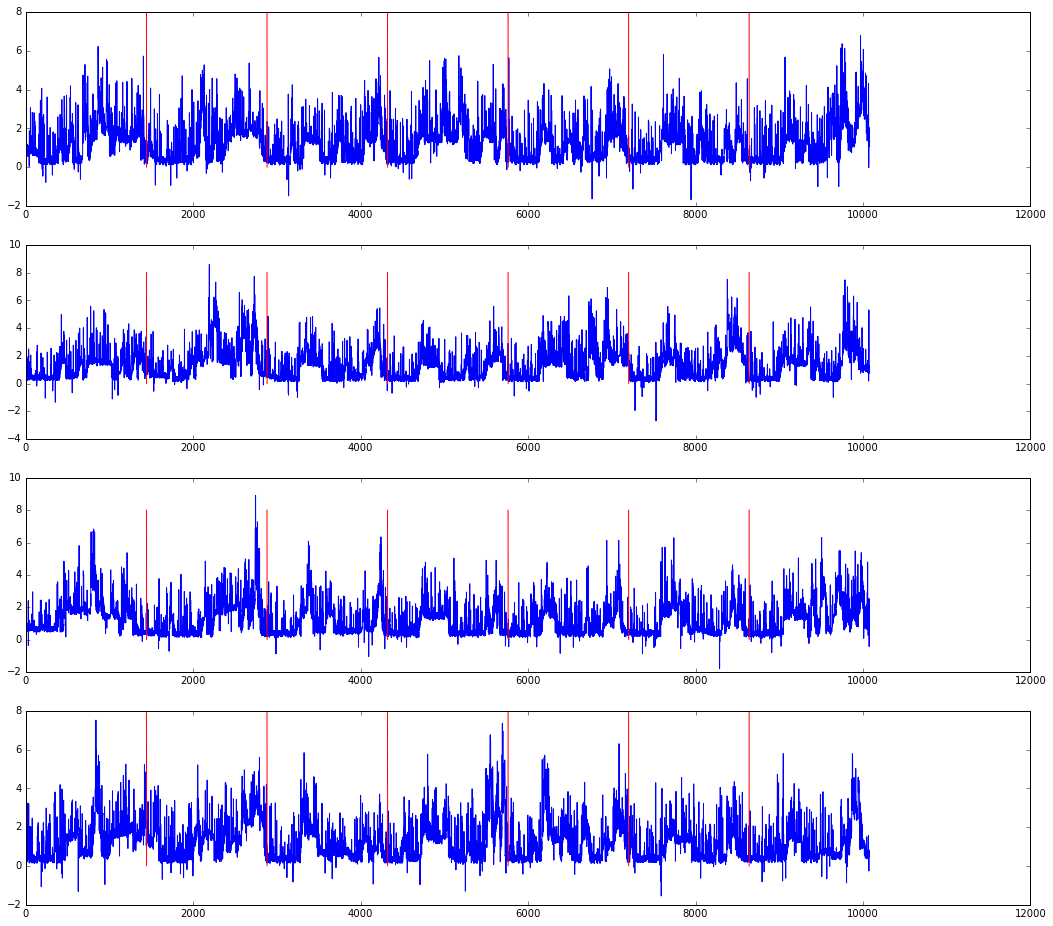

In [65]:
w1 = getWeekChunk(dt.date(2007, 6, 21))
w2 = getWeekChunk(dt.date(2007, 6, 14))
w3 = getWeekChunk(dt.date(2007, 6, 7))
w4 = getWeekChunk(dt.date(2007, 5, 31))

arr = np.arange(0,7*1440)

figure = plt.figure(figsize=(18, 16))
plt.subplot(4,1,1);
plt.plot(w1)
plt.plot(wk, 'r')

plt.subplot(4,1,2);
plt.plot(w2)
plt.plot(wk, 'r')
plt.subplot(4,1,3);
plt.plot(w3)
plt.plot(wk, 'r')
plt.subplot(4,1,4);
plt.plot(w4)
plt.plot(wk, 'r')




plt.show()

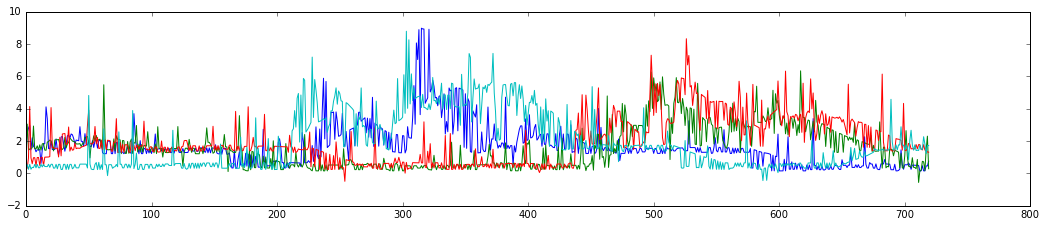

In [23]:
x1 = getDayChunk(dt.date(2007, 5, 20), 1, 'test')
x2 = getDayChunk(dt.date(2007, 5, 13), 1, 'test')
x3 = getDayChunk(dt.date(2007, 5, 6), 1, 'test')
x4 = getDayChunk(dt.date(2007, 4, 30), 1, 'test')



figure = plt.figure(figsize=(18, 16))
plt.subplot(4,1,1);
plt.plot(x1)
plt.subplot(4,1,1);
plt.plot(x2)
plt.subplot(4,1,1);
plt.plot(x3)
plt.subplot(4,1,1);
plt.plot(x4)
plt.show()